# Project Overview

A predictive analysis project on Human Resource. This is where I start getting my hands dirty by working on an HR data set. I go off to get the data set, clean it up, preprocess and engineer it. I will be building and training a model to predict whether or not an employee is due for promotion, on the basis of some variables.

## Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Data

In [15]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

In [16]:
train.head().isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [17]:
#testset
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


## The Summary Statistics

In [19]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [20]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


# Data Preprocessing

### Checking for missing and unique values

#### Missing Values

In [23]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [24]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

### *Observations from analysis*
-  We can observe that both the education and previous_year_rating columns have alot of missing values.
-  We can check these missing values as a percentage of the lenght of the total number of rows, to ascertain if to drop or keep them. 
-  Generallly if they are less than, say 4%, we can drop them. Otherwise, we will keep them.
-  If we keep them, we however need to investigate them further, to know the better way of going about their imputation

#### Checking the Unique Values for each column to idenfiy categorical variables

In [27]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [28]:
test.nunique()

employee_id             23490
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings             9
age                        41
previous_year_rating        5
length_of_service          34
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
dtype: int64

**Note**: employee_id has so many unique values. We will check how unique the values are, as a  percentage of the entire rows of the data set. 
We can equally do the same for other columns.

In [30]:
train.isnull().sum()/len(train)

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [31]:
# Checking for how unique each column is. Checking for the number and percentage of Missing Values for each column.

def missing_unique(dataset):

    unique_vals = dataset.nunique()
    unique_percent = round(unique_vals / len(dataset),3)*100
    missing_vals = dataset.isnull().sum()
    missing_vals_percent = round(dataset.isnull().sum() / len(dataset),3)*100
    
    return pd.concat([unique_vals,unique_percent,missing_vals,missing_vals_percent],axis=1, keys=['unique_vals','unique_percent','missing_vals','missing_vals_percent'])

    
missing_unique(train)

,unique_vals,unique_percent,missing_vals,missing_vals_percent
employee_id,54808,100.0,0,0.0
department,9,0.0,0,0.0
region,34,0.1,0,0.0
education,3,0.0,2409,4.4
gender,2,0.0,0,0.0
recruitment_channel,3,0.0,0,0.0
no_of_trainings,10,0.0,0,0.0
age,41,0.1,0,0.0
previous_year_rating,5,0.0,4124,7.5
length_of_service,35,0.1,0,0.0


In [32]:
missing_unique(test)

,unique_vals,unique_percent,missing_vals,missing_vals_percent
employee_id,23490,100.0,0,0.0
department,9,0.0,0,0.0
region,34,0.1,0,0.0
education,3,0.0,1034,4.4
gender,2,0.0,0,0.0
recruitment_channel,3,0.0,0,0.0
no_of_trainings,9,0.0,0,0.0
age,41,0.2,0,0.0
previous_year_rating,5,0.0,1812,7.7
length_of_service,34,0.1,0,0.0


- employee_id has 100% unique values. We will go ahead and drop it.
- The missing values for both of the education and previous_year_training columns seem to be high, at 4.4% and 7.7% respectively. Hence, We will do imputation on them.

In [34]:
train.drop('employee_id',axis=1,inplace=True)


In [35]:
test.drop('employee_id',axis=1,inplace=True)

### Investigating Missing Values using visuals. 


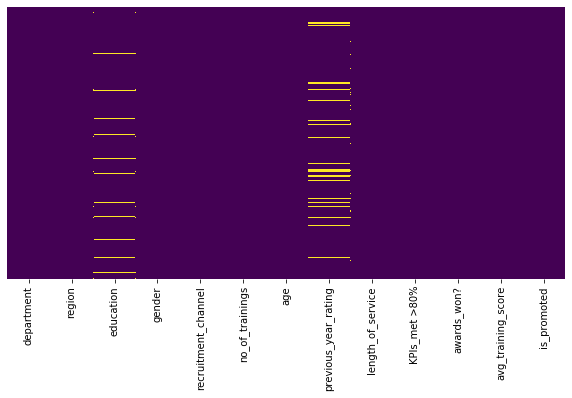

In [37]:
# Visualizing the Missing Values

plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

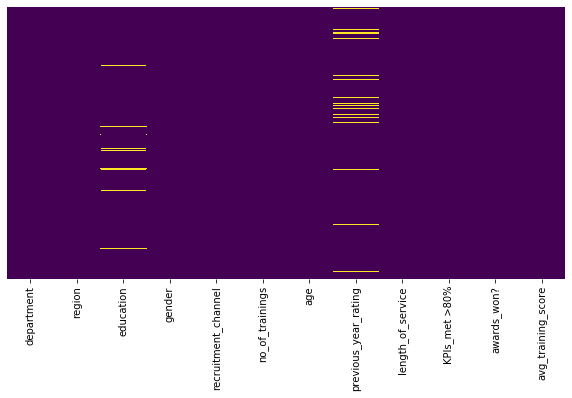

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### We can start the missing values investigation by checking the relationship between the columns with missing values (previous_year_rating and education) and the other columns.

In [40]:
# Subsetting all the rows having missing values for the previous_year_rating column

pyr_missing = train.loc[train.previous_year_rating.isnull()]


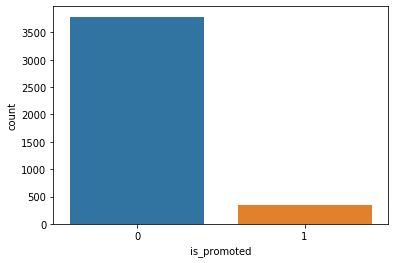

In [41]:
sns.countplot(pyr_missing['is_promoted'])

#### from the visual above we can see the problem of class imbalance as we have class 0's as the majority class and 1's as minority.

In [42]:
# The percentage of those that got promoted vs. those that did not, for all whose previous_year_rating values were missing

round(pyr_missing['is_promoted'].value_counts(normalize=True),2)*100 


0    92.0
1     8.0
Name: is_promoted, dtype: float64

**Inference**

92% of them did not get promoted, while just 8% did. This would have raised some inferential attention, but then we compared this with those whose previous_year_rating column values were not missing. Same pattern occurred.

In [44]:
# The percentage of those that got promoted vs. those that did not, for all whose previous_year_rating values were not missing

round(train.loc[train['previous_year_rating'].notna()].is_promoted.value_counts(normalize=True),2)*100


0    91.0
1     9.0
Name: is_promoted, dtype: float64

In [45]:
pyr_non_missing = train.loc[train['previous_year_rating'].notna()]

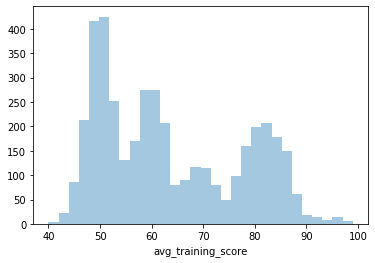

In [46]:
sns.distplot(pyr_missing.avg_training_score,kde=False,bins=30)

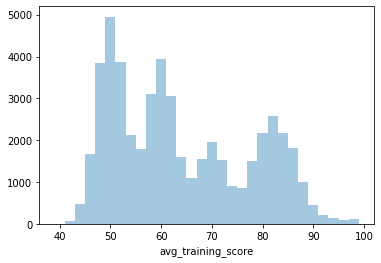

In [47]:
sns.distplot(pyr_non_missing.avg_training_score,kde=False,bins=30)

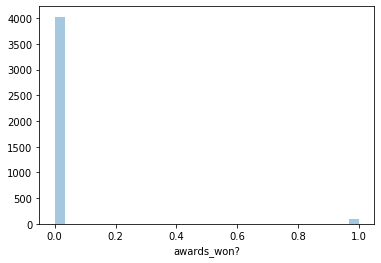

In [48]:
sns.distplot(pyr_missing['awards_won?'],kde=False,bins=30)


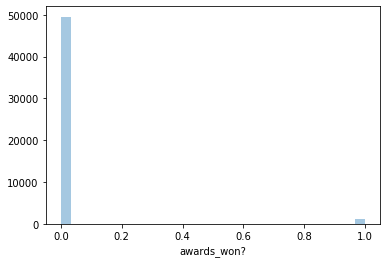

In [49]:
sns.distplot(pyr_non_missing['awards_won?'],kde=False,bins=30)

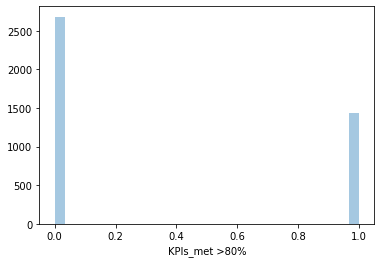

In [50]:
sns.distplot(pyr_missing['KPIs_met >80%'],kde=False,bins=30)

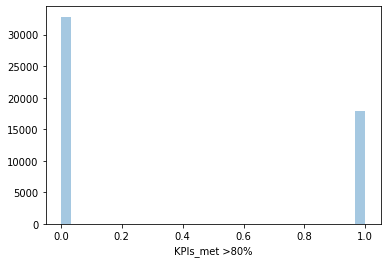

In [51]:
sns.distplot(pyr_non_missing['KPIs_met >80%'],kde=False,bins=30)

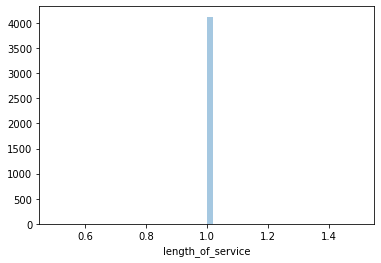

In [52]:
sns.distplot(pyr_missing['length_of_service'],kde=False,bins=50)

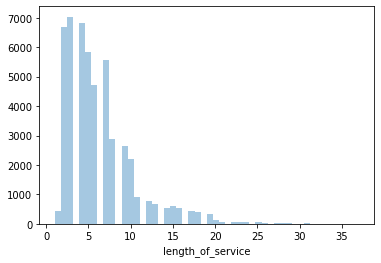

In [53]:
sns.distplot(pyr_non_missing['length_of_service'],kde=False,bins=50)

**Observation**

-  There appears to be a significant difference in the length_of_service values for those whose previous_year_rating values were missing vs. those whose were not.
- length_of_service was (1) for all employees who had missing values for their previous_year_rating. This may in part mean they all were newly employed and had not spent more than a year on the job. Although this claim alone is not sufficent enough to explain why their previous_year_rating values were missing, because there were also other (423) employees who had not spent more than a year, yet had the values for their previous_year_rating recorded. 


In [55]:
#(423) employees who had not spent more than a year, yet had the values for their previous_year_rating recorded.

new_but_rated = pyr_non_missing.loc[pyr_non_missing['length_of_service']==1]
new_but_rated.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
439,Legal,region_11,Bachelor's,m,other,1,31,3.0,1,1,0,62,0
461,Sales & Marketing,region_9,Master's & above,f,sourcing,1,31,3.0,1,0,0,54,0
526,Operations,region_8,Bachelor's,f,sourcing,1,25,3.0,1,0,0,62,0
536,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1
784,Sales & Marketing,region_28,Master's & above,f,other,1,31,3.0,1,0,0,47,0


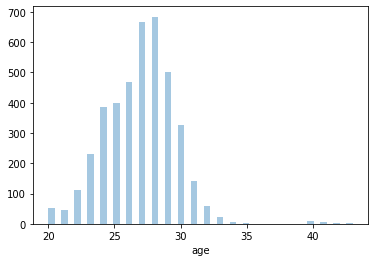

In [56]:
sns.distplot(pyr_missing['age'],kde=False)

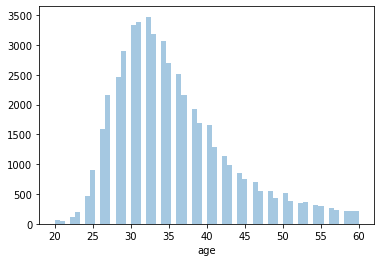

In [57]:
sns.distplot(pyr_non_missing['age'],kde=False,bins=60)

#### Age distribution of those whose values for  previous_year_rating were recorded is skewed to the right by the ages of those who were 50 and older. The case is the opposite for the other group. This may show they had younger people joining the organization than older people.


In [59]:
new_but_rated.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
439,Legal,region_11,Bachelor's,m,other,1,31,3.0,1,1,0,62,0
461,Sales & Marketing,region_9,Master's & above,f,sourcing,1,31,3.0,1,0,0,54,0
526,Operations,region_8,Bachelor's,f,sourcing,1,25,3.0,1,0,0,62,0
536,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1
784,Sales & Marketing,region_28,Master's & above,f,other,1,31,3.0,1,0,0,47,0


In [60]:
pyr_missing.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0


### Investigating the differences between the 2 groups of employees whose previous_year_rating values were missing and whose theirs were not (all of whom had not spent more than (1) year on the job)

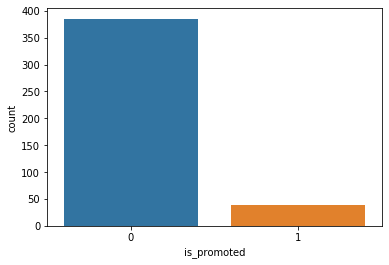

In [62]:
sns.countplot(new_but_rated['is_promoted'])

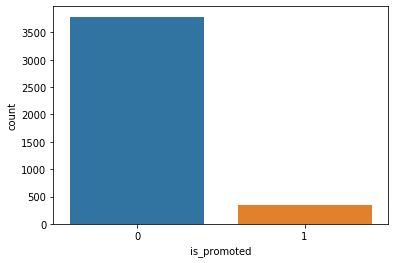

In [63]:
sns.countplot(pyr_missing['is_promoted'])

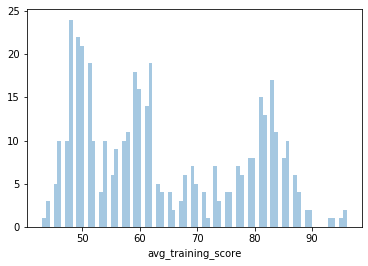

In [64]:
sns.distplot(new_but_rated['avg_training_score'],kde=False,bins=80)

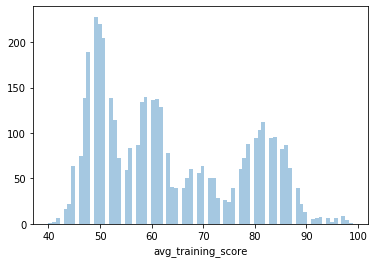

In [65]:
sns.distplot(pyr_missing['avg_training_score'],kde=False,bins=80)

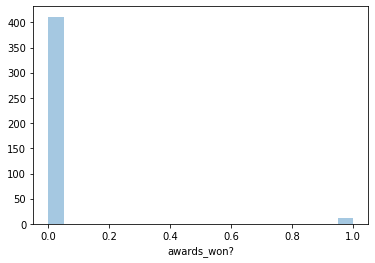

In [66]:
sns.distplot(new_but_rated['awards_won?'],kde=False)

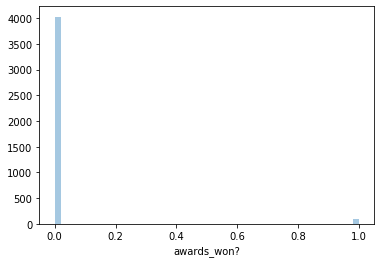

In [67]:

sns.distplot(pyr_missing['awards_won?'],kde=False)

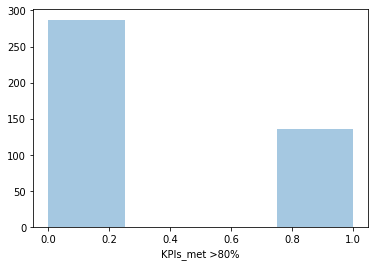

In [68]:
sns.distplot(new_but_rated['KPIs_met >80%'],kde=False)

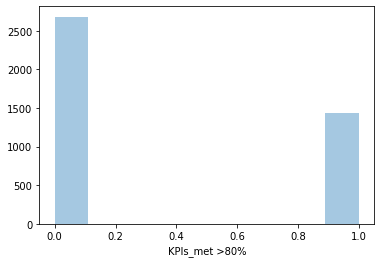

In [69]:
sns.distplot(pyr_missing['KPIs_met >80%'],kde=False)

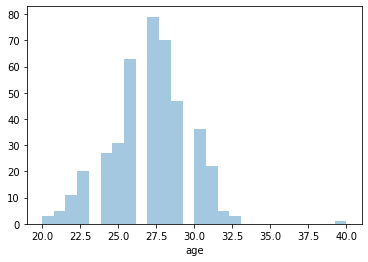

In [70]:
sns.distplot(new_but_rated['age'],kde=False)

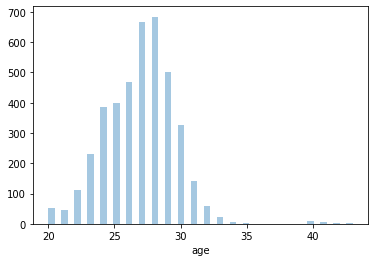

In [71]:
sns.distplot(pyr_missing['age'],kde=False)

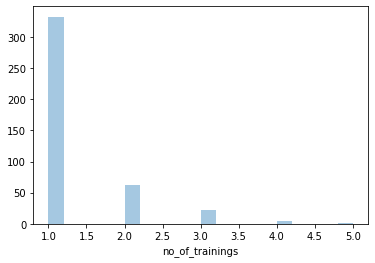

In [72]:
sns.distplot(new_but_rated['no_of_trainings'],kde=False)

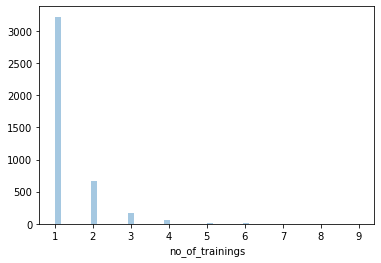

In [73]:
sns.distplot(pyr_missing['no_of_trainings'],kde=False)

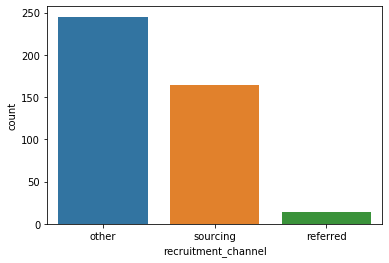

In [74]:

sns.countplot(new_but_rated['recruitment_channel'])

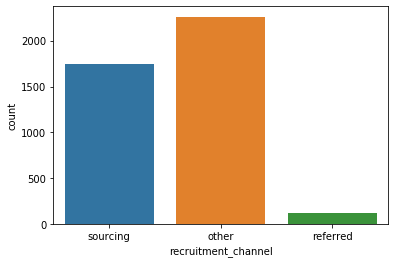

In [75]:

sns.countplot(pyr_missing['recruitment_channel'])

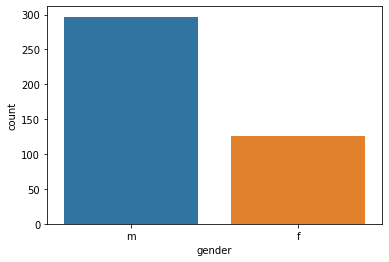

In [76]:
sns.countplot(new_but_rated['gender'])

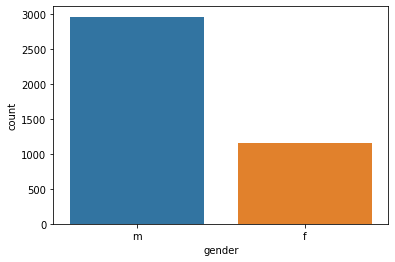

In [77]:
sns.countplot(pyr_missing['gender'])

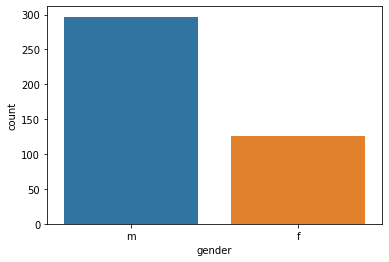

In [78]:
sns.countplot(new_but_rated['gender'])

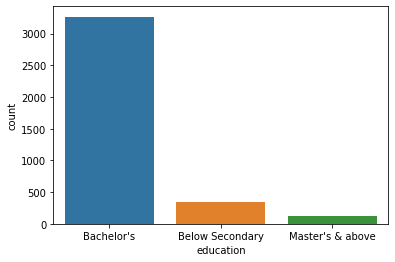

In [79]:
sns.countplot(pyr_missing['education'])

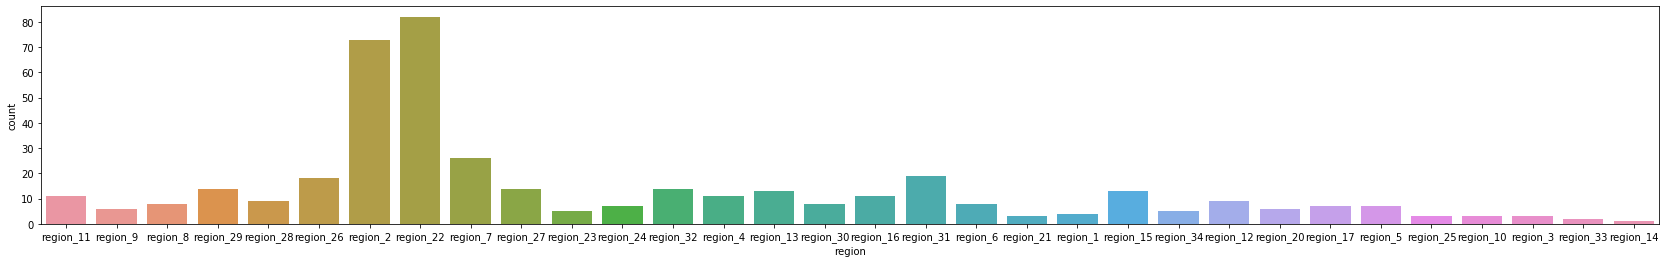

In [80]:
plt.figure(figsize=(29,4))
sns.countplot(new_but_rated['region'])

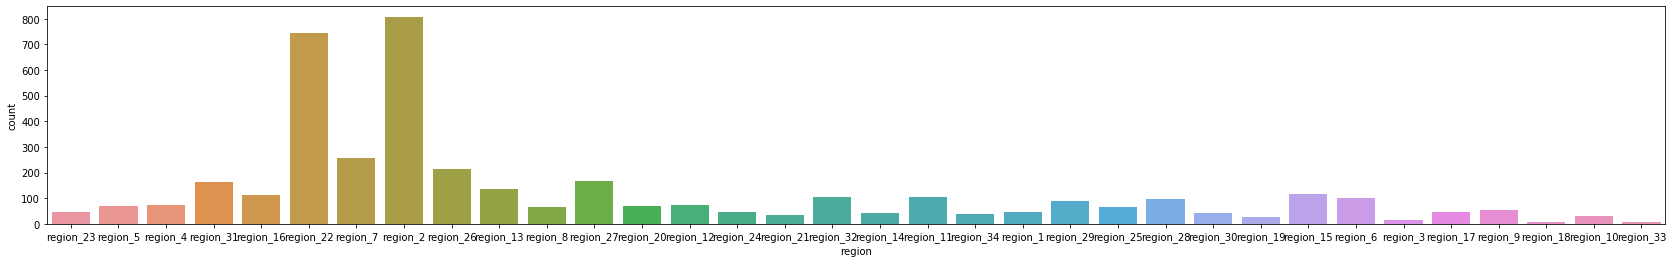

In [81]:
plt.figure(figsize=(29,4))
sns.countplot(pyr_missing['region'])

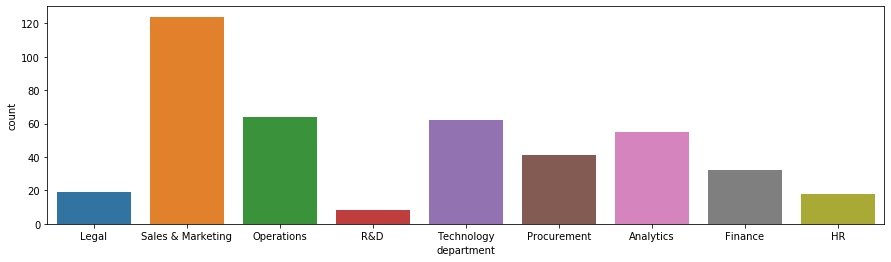

In [82]:
plt.figure(figsize=(15,4))
sns.countplot(new_but_rated['department'])

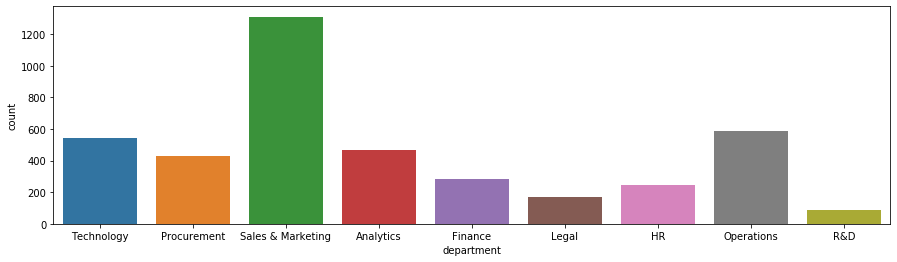

In [83]:
plt.figure(figsize=(15,4))
sns.countplot(pyr_missing['department'])

**Observation**

Since all employees who had not spent more than (1) year on the job (both whose previous_year_rating values were missing and whose theirs were not) may have a thing in common, we can impute the missing values of the first group with the mean or median value for previous_year_rating of the other

In [85]:
new_but_rated.previous_year_rating.mean()

3.2624113475177303

In [86]:
train_copy = train.copy()
train_copy['previous_year_rating'].fillna(3.3, inplace=True)
train_copy.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [87]:
test_copy = test.copy()
test_copy['previous_year_rating'].fillna(test['previous_year_rating'].mean(),inplace=True)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


#### Missing Values for education

In [89]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [90]:
test.education.value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [91]:
# Since the missing values for education is at 4.4% and most of the most common educational attainment level is Bachelor's, followed by Master's & above, we can propagate the missing values forward.

#train_copy= train.copy()
train_copy['education'].fillna(method='ffill',inplace=True)


In [92]:
#test_copy = test.copy()
test_copy['education'].fillna(method='ffill',inplace=True)


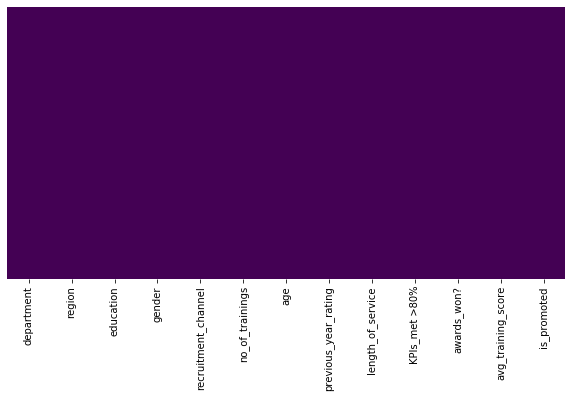

In [93]:
plt.figure(figsize=(10,5))
sns.heatmap(train_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

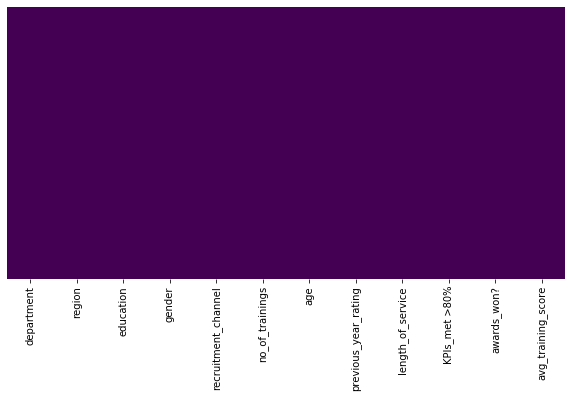

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(test_copy.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Observation**

from the heatmap above it's obvious that the variables have no form of correlations 

### Checking for duplicates

In [96]:
sum(train.duplicated())

118

In [97]:
sum(test.duplicated())

26

In [98]:
train_copy.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Visualizing the Data

### We are not going to do much EDA, since we have visualized most part of the data in the Data Preprocessing stage. 

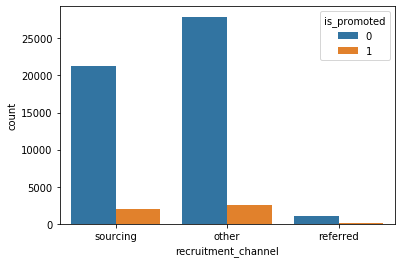

In [100]:
sns.countplot(data=train,x='recruitment_channel',hue='is_promoted')

In [101]:
train_copy.groupby(['education'])['is_promoted'].sum()

education
Bachelor's          3094
Below Secondary       71
Master's & above    1503
Name: is_promoted, dtype: int64

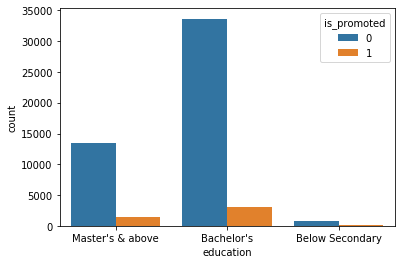

In [102]:
sns.countplot(data=train,x='education',hue='is_promoted')

- Sumarily, a Bachelor's degree tended to be the primary or major consideration for promotion.

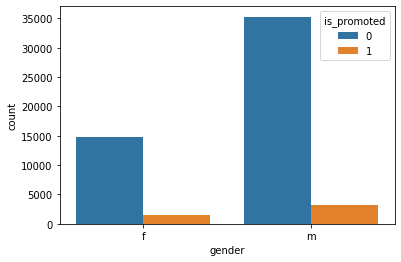

In [104]:
sns.countplot(data=train_copy,x='gender',hue='is_promoted')

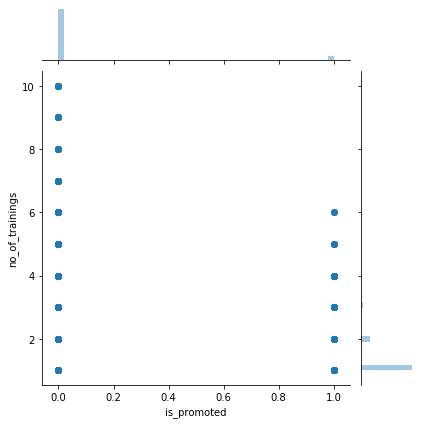

In [105]:
sns.jointplot(data=train_copy,y='no_of_trainings',x='is_promoted')


**Observation**

Employees who had been trained for 7 times and above were more likely to not get promoted, while those who had been trained for lesser times were likely to get promoted. 
It is a questionable scenario which might mean the more underperforming employees were, the more trainings they got.

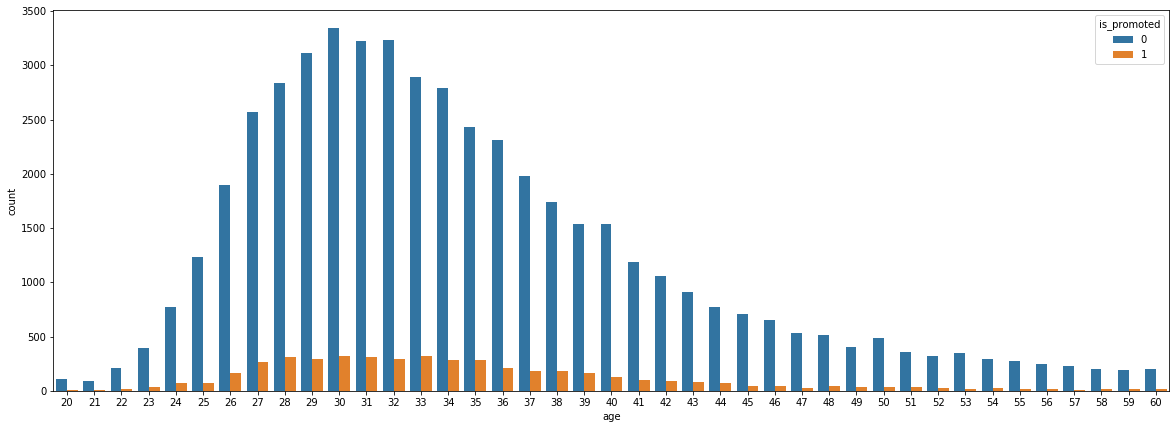

In [107]:
plt.figure(figsize=(20,7))
sns.countplot(data=train_copy,x='age',hue='is_promoted')

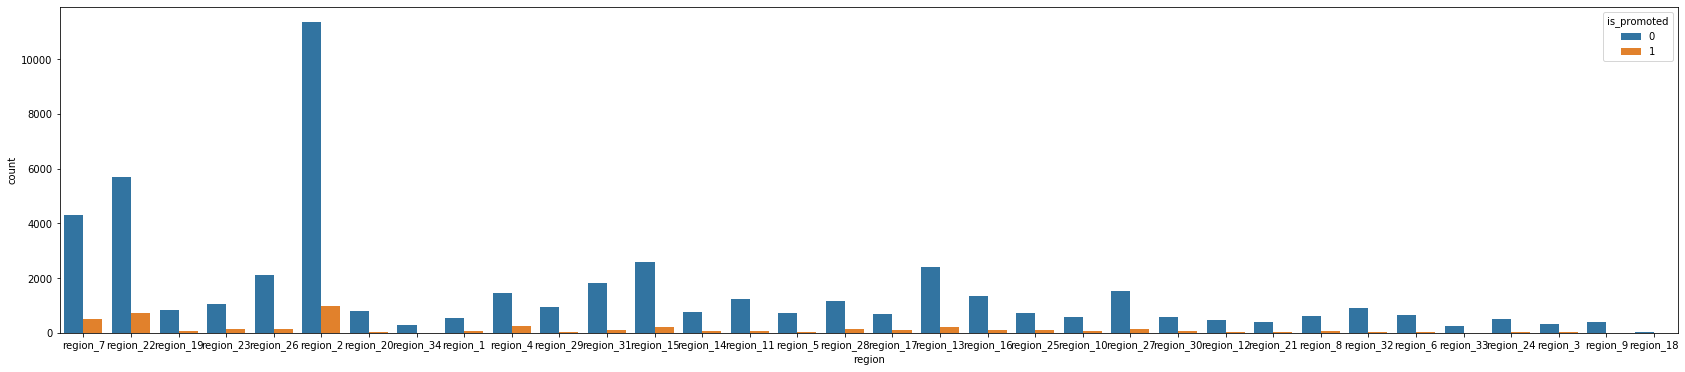

In [108]:
#sns.barplot(data= train,x=train.region,y='is_promoted')
#data=train.groupby('region')['is_promoted'].sum()
#plt.pie(data,labels=data.index,autopct='%1.1f%%')
plt.figure(figsize=(29,6))
sns.countplot(data=train_copy,x=train_copy['region'],hue='is_promoted')

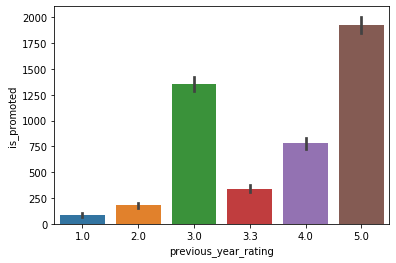

In [109]:
sns.barplot(data=train_copy,x='previous_year_rating',y='is_promoted',estimator=np.sum)

**Observation**

Employees with a previous_year_rating of 5 were the most promoted, followed by those with a rating of 4

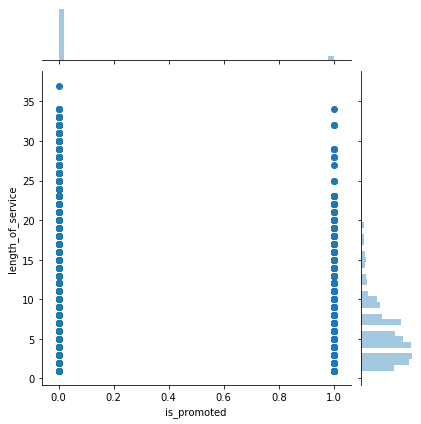

In [111]:
sns.jointplot(data=train_copy,y='length_of_service',x='is_promoted')

There seems not to be any dsicernable relationship between promotion and length of service. 

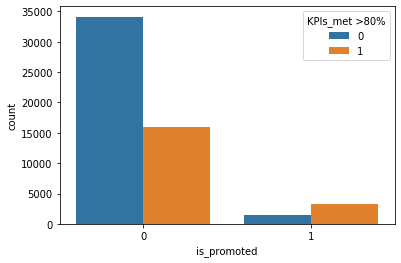

In [113]:
 sns.countplot(data=train_copy,x=train_copy['is_promoted'],hue='KPIs_met >80%')

There seems to be no discernable relationship between KPIs_met>80 and promotion. There appears to be no affirmation that employees who had met over 80% KPIs would get promoted

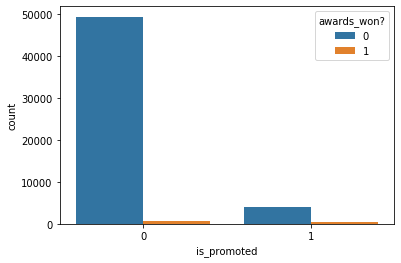

In [115]:

sns.countplot(data=train_copy,x=train_copy['is_promoted'],hue='awards_won?')


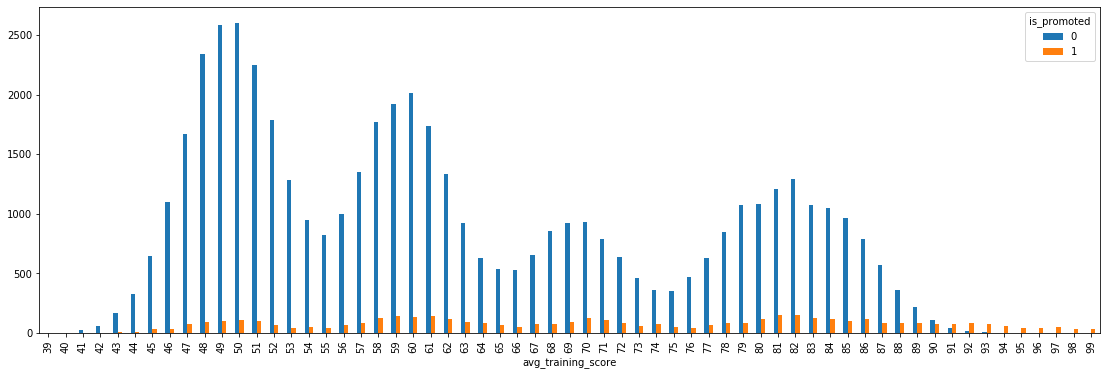

In [116]:
pd.crosstab(train_copy['avg_training_score'],train_copy['is_promoted'] ).plot.bar(figsize=(19,6))

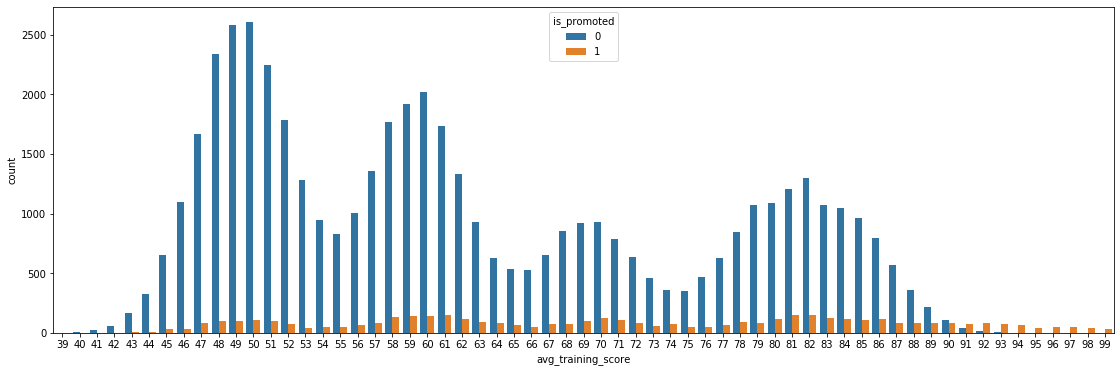

In [117]:
plt.figure(figsize=(19,6))
sns.countplot(data=train_copy,x=train_copy['avg_training_score'],hue='is_promoted')

In [118]:
train_copy

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


## Feature Scaling

In [119]:
train_copy.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [120]:
#from sklearn.preprocessing import StandardScaler

In [121]:
#scaler = StandardScaler()

In [122]:

#train_copy.iloc[:,[5,6,7,8,11]] = scaler.fit_transform(train_copy.iloc[:,[5,6,7,8,11]])

In [123]:
#test_copy.iloc[:,[5,6,7,8,11]] = scaler.transform(test_copy.iloc[:,[5,6,7,8,11]])

In [124]:
X = train_copy.copy()
X.drop(['is_promoted','department','region'],axis=1,inplace=True)
X
y=train_copy['is_promoted']
X.head()

,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

# Encoding Categorical Features

In [126]:
train_dummy = train_copy.copy()
train_dummy.drop(['department','region'],axis=1,inplace=True)
train_dummy = pd.get_dummies(train_dummy,drop_first=True)
train_dummy

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0,0,0,1,0,1
54804,1,37,2.0,6,0,0,56,0,0,1,0,0,0
54805,1,27,5.0,3,1,0,79,0,0,0,1,0,0
54806,1,29,1.0,2,0,0,45,0,0,0,1,0,1


In [ ]:
#test_dummy = test_copy.copy()
#test_dummy.drop(['department','region'],axis=1,inplace=True)
#test_dummy = pd.get_dummies(test_dummy,drop_first=True)
#test_dummy
X_train

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [128]:

X = train_dummy.copy()
X.drop(['is_promoted'],axis=1,inplace=True)
y=train_dummy['is_promoted']
X.head()


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,1,0,0,1
1,1,30,5.0,4,0,0,60,0,0,1,0,0
2,1,34,3.0,7,0,0,50,0,0,1,0,1
3,2,39,1.0,10,0,0,50,0,0,1,0,0
4,1,45,3.0,2,0,0,73,0,0,1,0,0


In [ ]:
X_new = test_dummy.copy()
X_new

# Training the Model

In [130]:
# Logistic Regression

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [132]:
y_test

39093    0
3582     1
35725    0
6436     0
20143    0
        ..
32636    0
19734    0
30808    0
13422    1
42344    0
Name: is_promoted, Length: 10962, dtype: int64

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [134]:
log_model=RandomForestClassifier(class_weight='balanced')

In [135]:
log_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
log_predict = log_model.predict(X_test)

#### Evaluating Model Accuracy

In [138]:
from sklearn.metrics import confusion_matrix,classification_report

In [139]:
confusion_matrix(y_test,log_predict)

array([[9805,  197],
       [ 776,  184]], dtype=int64)

In [140]:
print(classification_report(y_test,log_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10002
           1       0.48      0.19      0.27       960

    accuracy                           0.91     10962
   macro avg       0.70      0.59      0.61     10962
weighted avg       0.89      0.91      0.89     10962



### KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
kn_model = KNeighborsClassifier(metric='minkowski', n_neighbors=5,p=2)

In [143]:
kn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [144]:
kn_predict = kn_model.predict(X_test)

In [145]:
confusion_matrix(y_test,kn_predict)

array([[9926,   76],
       [ 834,  126]], dtype=int64)

In [146]:
print(classification_report(y_test,kn_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10002
           1       0.62      0.13      0.22       960

    accuracy                           0.92     10962
   macro avg       0.77      0.56      0.59     10962
weighted avg       0.90      0.92      0.89     10962



In [147]:
np.array([1,0,1],dtype=bool)

array([ True, False,  True])

In [ ]:
len(train_copy.department.value_counts())

In [ ]:
#plt.figure(figsize=(30,4))
#sns.countplot(data=df,x='is_promoted')
#sns.countplot(df['avg_training_score'])

**Next steps for this**

- Sampling
- Use other algorithms (bagging and booasting type)
- Hyparameters tuning (Randomised)